## European Commission

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("commission-lobbists-meetings.csv", parse_dates=["date"], dayfirst = True)
df.head()

,nr,commission_representative,portfolio,date,location,subject(s)-edited,lobbyist,health_meeting_or_lab,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,1,"Ladislav Miko, Director-General",Director-General of Health and Food Safety (SA...,2015-04-15,"Brussels, BELGIUM",Seeds,"ARCHE NOAH, Gesellschaft für die Erhaltung der...",False,NaN,NaN,NaN
1,2,"Arunas Ribokas, Cabinet member of Vytenis Andr...",Health & Food Safety,2015-01-30,Brussels,"The Food Chain, Innovation and Challenges, Foo...","ARCHE NOAH, Gesellschaft für die Erhaltung der...",False,NaN,NaN,NaN
2,3,"Nathalie Chaze, Cabinet member of Vytenis Andr...",Health & Food Safety,2015-01-06,Brussels,Plant Reproductive Material Proposal,"ARCHE NOAH, Gesellschaft für die Erhaltung der...",False,NaN,NaN,NaN
3,1,"Roberto Viola, Director-General","Director-General of Communications Networks, C...",2019-02-21,Brussels,Quantum Technologies,Austrian Institute of Technology GmbH (AIT),False,NaN,NaN,NaN
4,2,"Mariya Gabriel, Commissioner",Digital Economy and Society,2019-01-08,Sofia,"Cloud computing, Cybersecurity",Austrian Institute of Technology GmbH (AIT),False,NaN,NaN,NaN


Create a list of all unique locations, sorted in alphabetical order.


In [3]:
unique_locations = sorted(list(set(df["location"].astype(str).tolist())))
unique_locations[:10]

['1 Rue Zinner',
 'Algiers',
 'AmCham EU office, on Avenue des Arts 53, 1000 Brussels',
 'Amcham',
 'Amsterdam',
 'Amsterdam - Elsevier HQ',
 'Amsterdam, The Netherlands',
 'Ancient Olympia, Greece',
 'Antwerp',
 'Athens']

Add a new column `"is_brussels"` that contains a True for every meeting that was held in Brussels, fully face to face or partially remotely. Look for references to Brussels in the `"location"` column including misspellings, specific hotels and buildings in the city, abbreviations, French spellings, ... go as far as you want.

In [4]:
df["is_brussels"] = df["location"].str.lower().str.contains("br[uyü][sx][se][les][eslk][es]?|berlaymont|berl", na=False)
df["is_brussels"].head()

0     True
1     True
2     True
3     True
4    False
Name: is_brussels, dtype: bool

In [5]:
df["is_brussels"].value_counts()[True]

9932

Add a new column "num_representatives" to the `commission-lobbists-meetings.csv` DataFrame accounting for the number of representatives. Hint: have a look at the Series.explode method.

>Is this new `"num_representatives"` column equal to the existing `"nr"` column?

>What are the meetings that have the maximum number of representatives attending? What do they have in common?

In [6]:
df["num_representatives"] = df["commission_representative"].str.split(";").explode().reset_index().groupby("index").count()
df["num_representatives"].head()

0    1
1    4
2    2
3    1
4    1
Name: num_representatives, dtype: int64

In [7]:
both_equal = (df["num_representatives"] == df["nr"]).value_counts()[True]
print("both columns are equal for",both_equal, "rows out of 12025.")

both columns are equal for 1222 rows out of 12025.


In [8]:
df["num_representatives"].max()

11

In [9]:
#to see the similarities between the meetings with the max number of representatives
df.sort_values("num_representatives", ascending=False, inplace=False)[:6]

,nr,commission_representative,portfolio,date,location,subject(s)-edited,lobbyist,health_meeting_or_lab,Unnamed: 8,Unnamed: 9,Unnamed: 10,is_brussels,num_representatives
8973,1,"Anthony Whelan, Cabinet member of Ursula von d...",President,2020-07-30,Brussels - Belgium,"Brainstorming Session on ""The State of the Uni...",Rijksuniversiteit Groningen (UG),False,NaN,NaN,NaN,True,11
5714,1,"Olivier Smith, Cabinet member of Ursula von de...",President,2020-07-30,Brussels - Belgium,"Brainstorming Session on ""The State of the Uni...",Københavns Universitet (UCPH),False,NaN,NaN,NaN,True,11
8520,2,"Per Haugaard, Cabinet member of Ursula von der...",President,2020-07-30,Brussels - Belgium,"Brainstorming Session on ""The State of the Uni...",European University Institute (EUI),False,NaN,NaN,NaN,True,11
4233,6,"Olivier Smith, Cabinet member of Ursula von de...",President,2020-07-30,Brussels - Belgium,"Brainstorming Session on ""The State of the Uni...",Open Society European Policy Institute (OSEPI),False,NaN,NaN,NaN,True,11
6189,1,"Mary Veronica Tovsak Pleterski, Cabinet member...",President,2020-07-30,Brussels - Belgium,"Brainstorming Session on ""The State of the Uni...",Business at OECD (BIAC),False,NaN,NaN,NaN,True,11
5425,1,"Fernando Sampedro Marcos, Cabinet member of Ur...",President,2020-07-28,Brussels - Belgium,High-Level Roundtable Discussion on The State ...,Vrije Universiteit Brussel (VUB),True,NaN,NaN,NaN,True,10


## $GOOG data

Load the `GOOG.csv` dataset and extract the Close value of 2019 to a separate Series, resample it by Business day, and fill the weekend gaps with the value from Friday (hence, forward).

In [10]:
googdf = pd.read_csv("GOOG.csv", parse_dates=["Date"], dayfirst=True, index_col="Date")
googdf.head()

,Open,High,Low,Close,Volume
Date,,,,,
2004-08-19 16:00:00,50.00,52.03,47.98,50.16,22353092
2004-08-20 16:00:00,50.74,54.54,50.25,54.15,11429498
2004-08-23 16:00:00,55.42,56.74,54.52,54.70,9140244
2004-08-24 16:00:00,55.65,55.80,51.78,52.43,7632224
2004-08-25 16:00:00,52.48,54.00,51.94,53.00,4599110


In [11]:
close2019 = googdf.loc[googdf.index.year==2019]["Close"].resample("B").fillna(method ="ffill")
close2019

Date
2019-01-02        NaN
2019-01-03    1045.85
2019-01-04    1016.06
2019-01-07    1070.71
2019-01-08    1068.39
               ...   
2019-12-25    1343.56
2019-12-26    1343.56
2019-12-27    1360.40
2019-12-30    1351.89
2019-12-31    1336.14
Freq: B, Name: Close, Length: 260, dtype: float64

Plot the raw series, the monthly mean including markers (to easily identify the points), and a rolling mean of 20 business days, all in the same axes.


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

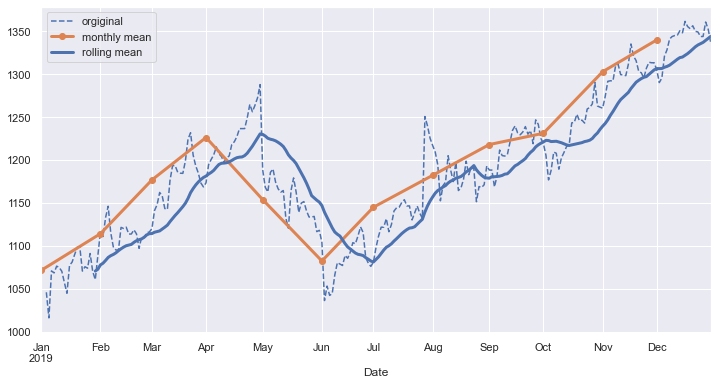

In [13]:
fig, ax = plt.subplots(figsize = (12,6))

close2019.plot(linestyle = "--", label = "orgiginal", ax=ax)
close2019.resample("M").mean().plot(label="monthly mean",linewidth=3, marker="o", ax=ax)
close2019.rolling(20).mean().plot(label="rolling mean",linewidth=3, color="b", ax=ax)
plt.legend()